# Confidence Interval

In [4]:
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns #Visualisasi data
from scipy.stats import uniform
from scipy.stats import norm
import scipy.stats as stats
import random
import warnings

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('/content/sample_data/nyc-rolling-sales.csv')

print('Data read into to a pandas dataframe!')

Data read into to a pandas dataframe!


In [7]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [8]:
def borough(x):
  if x==1:
    return 1
  else:
    return 0

In [9]:
df['borough'] = df['BOROUGH'].apply(borough)
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,borough
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,1
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00,1
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00,1
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,1
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71430 entries, 0 to 71429
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      71430 non-null  int64 
 1   BOROUGH                         71430 non-null  int64 
 2   NEIGHBORHOOD                    71430 non-null  object
 3   BUILDING CLASS CATEGORY         71430 non-null  object
 4   TAX CLASS AT PRESENT            71430 non-null  object
 5   BLOCK                           71430 non-null  int64 
 6   LOT                             71430 non-null  int64 
 7   EASE-MENT                       71430 non-null  object
 8   BUILDING CLASS AT PRESENT       71430 non-null  object
 9   ADDRESS                         71430 non-null  object
 10  APARTMENT NUMBER                71430 non-null  object
 11  ZIP CODE                        71430 non-null  int64 
 12  RESIDENTIAL UNITS               71430 non-null

In [11]:
df.isna().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
borough                           0
dtype: int64

In [12]:
df.NEIGHBORHOOD.value_counts()

FLUSHING-NORTH              3068
UPPER EAST SIDE (59-79)     1736
UPPER EAST SIDE (79-96)     1590
UPPER WEST SIDE (59-79)     1439
BEDFORD STUYVESANT          1436
                            ... 
VAN CORTLANDT PARK             2
PELHAM BAY                     1
BRONX PARK                     1
CITY ISLAND-PELHAM STRIP       1
EAST RIVER                     1
Name: NEIGHBORHOOD, Length: 188, dtype: int64

In [13]:
df.groupby(['borough','NEIGHBORHOOD'])[['NEIGHBORHOOD']].count()

NEIGHBORHOOD
borough NEIGHBORHOOD                          
0       AIRPORT LA GUARDIA                   8
        ARVERNE                            197
        ASTORIA                           1216
        BATH BEACH                         272
        BATHGATE                            68
...                                        ...
1       UPPER WEST SIDE (59-79)           1439
        UPPER WEST SIDE (79-96)           1004
        UPPER WEST SIDE (96-116)           358
        WASHINGTON HEIGHTS LOWER           151
        WASHINGTON HEIGHTS UPPER           289

[188 rows x 1 columns]

In [14]:
n = 86+226
pro_fm = 226/n
print(n,pro_fm)

312 0.7243589743589743


In [15]:
stderror_fm = (pro_fm*(1-pro_fm)/n)**(1/2)
stderror_fm

0.02529714756803247

In [16]:
z_score = 1.96
low_ci_fm = pro_fm - (z_score*stderror_fm)
up_ci_fm = pro_fm + (z_score*stderror_fm)
print(low_ci_fm,up_ci_fm)

0.6747765651256307 0.773941383592318


In [17]:
 print('Margin Error=',(z_score*stderror_fm))

Margin Error= 0.049582409233343644


In [18]:
z_score = 1.96
low_ci_fm = pro_fm - (z_score*stderror_fm)
up_ci_fm = pro_fm + (z_score*stderror_fm)
print(low_ci_fm,up_ci_fm)

0.6747765651256307 0.773941383592318


In [19]:
 print('Margin Error=',(z_score*stderror_fm))

Margin Error= 0.049582409233343644


In [20]:
df.head(2)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,borough
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,1
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00,1


In [21]:
BOROUGH = norm.rvs(loc=181,scale=24,size=6000)
NEIGHBORHOOD = norm.rvs(loc=132,scale=22,size=6500)
all_mass = np.concatenate([BOROUGH,NEIGHBORHOOD],axis=0)
df_mass = pd.DataFrame(all_mass,columns=['NEIGHBORHOOD'])
df_mass

,NEIGHBORHOOD
0,171.489726
1,138.446235
2,151.971133
3,187.179603
4,207.696448
...,...
12495,93.196990
12496,120.637608
12497,93.581653
12498,145.291559


<ipython-input-22-accd3626e08a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_mass['NEIGHBORHOOD'])


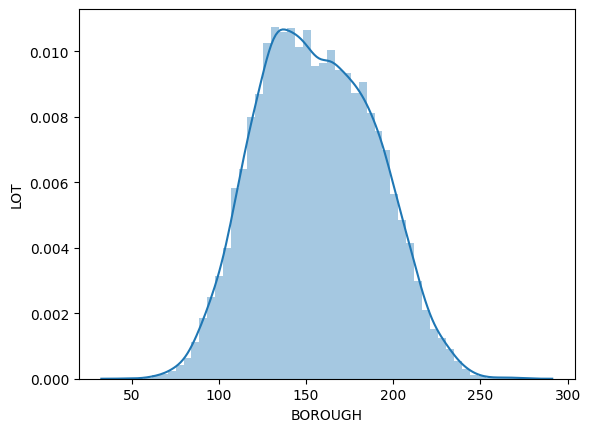

In [22]:
sns.distplot(df_mass['NEIGHBORHOOD'])
plt.ylabel('LOT')
plt.xlabel('BOROUGH')
plt.show()

In [24]:
df.head(2)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,borough
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,1
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00,1


In [26]:
#Mean
neighborhood = df_mass['NEIGHBORHOOD'].mean()
neighborhood

155.8424537859602

In [27]:
# Standard Deviation
neighborhood = df_mass['NEIGHBORHOOD'].std(ddof=1)
neighborhood

33.40083877104905

In [28]:
n = 30
neighborhood=[]
for sample in range(0,250):
    sample_values= df_mass['NEIGHBORHOOD'].sample(n)
    sample_mean = sample_values.mean()
    neighborhood.append(sample_mean)

<ipython-input-29-050d1c29ffbb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neighborhood)


<Axes: ylabel='Density'>

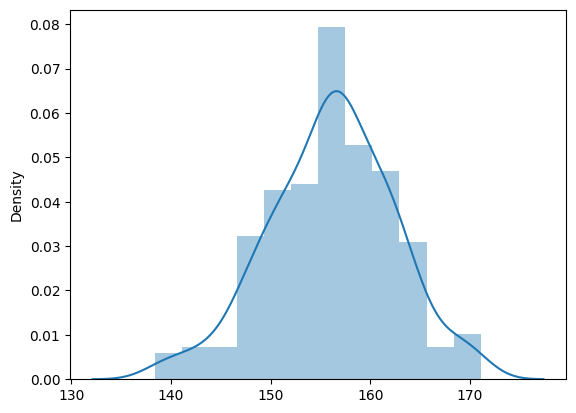

In [29]:
sns.distplot(neighborhood)

In [30]:
df_mass['NEIGHBORHOOD'].sample(10)

10020    134.003232
10774    136.205104
4841     205.305021
2159     179.376562
7138     140.627924
1000     161.212806
9100     114.912909
10312    145.176975
2083     170.293083
2237     175.991783
Name: NEIGHBORHOOD, dtype: float64

In [32]:
mean_of_sample_means = np.mean(neighborhood)
median_of_sample_means = np.median(neighborhood)
mean_of_sample_means , median_of_sample_means

(156.12058437405346, 156.39572572418263)

In [ ]:
neighborhood

In [36]:
std_of_sample_means = np.std(neighborhood)
std_of_sample_means

6.314314245662303

In [38]:
standard_error = neighborhood/np.sqrt(n)
standard_error

array([28.55223125, 28.04364582, 27.11467033, 26.95933161, 27.60680664,
       29.24547915, 27.33735238, 29.29265931, 26.84775172, 27.91438922,
       27.17442817, 28.62202224, 28.27623219, 28.10138833, 27.306243  ,
       28.35577598, 29.13877758, 28.49873013, 28.74276334, 29.44095321,
       29.24011591, 31.23953062, 28.3023566 , 28.51650811, 28.90556943,
       27.55495194, 30.11941063, 30.23600909, 29.50628924, 27.56021916,
       29.13102416, 30.08063675, 25.79564935, 28.9637856 , 29.08631496,
       29.54061553, 28.29038126, 29.15471299, 30.63907735, 28.64597815,
       29.3436546 , 29.6071037 , 28.45336624, 29.31525205, 29.61604243,
       28.64754046, 27.37657182, 29.62878277, 27.94778442, 28.63967129,
       30.82012018, 28.19892692, 26.80294016, 28.94009834, 29.21626179,
       26.35952195, 28.75582966, 27.54348225, 31.05130759, 27.0821522 ,
       28.25512156, 28.88481699, 29.72432857, 28.78074895, 28.64312729,
       29.88983244, 30.67229819, 28.26837154, 28.26475516, 29.88

In [39]:
std_of_sample_means

6.314314245662303

In [40]:
df.head(2)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,borough
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,1
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00,1


In [41]:
stats.norm.cdf(2.17)

0.9849965770262678

In [42]:
z = 1.96

In [43]:
lower_bound = mean_of_sample_means - z * standard_error
lower_bound

array([100.15821112, 101.15503856, 102.97583054, 103.28029443,
       102.01124336,  98.79944525, 102.53937372,  98.70697213,
       103.49899101, 101.40838151, 102.85870515, 100.02142078,
       100.69916928, 101.04186325, 102.60034809, 100.54326346,
        99.00858031, 100.26307331,  99.78476822,  98.41631609,
        98.8099572 ,  94.89110436, 100.64796544, 100.22822849,
        99.46566829, 102.11287856,  97.08653955,  96.85800656,
        98.28825747, 102.10255482,  99.02377703,  97.16253634,
       105.56111165,  99.35156459,  99.11140705,  98.22097794,
       100.67143711,  98.97734691,  96.06799278,  99.97446721,
        98.60702135,  98.09066113, 100.35198655,  98.66269036,
        98.0731412 ,  99.97140508, 102.4625036 ,  98.04817015,
       101.3429269 ,  99.98682865,  95.71314882, 100.85068761,
       103.58682167,  99.39799162,  98.85671127, 104.45592135,
        99.75915823, 102.13535916,  95.26002151, 103.03956607,
       100.74054612,  99.50634307,  97.86090037,  99.71

In [81]:
upper_bound = mean_of_sample_means + z * standard_error
upper_bound

array([212.08295763, 211.08613018, 209.26533821, 208.96087432,
       210.22992539, 213.4417235 , 209.70179503, 213.53419662,
       208.74217774, 210.83278724, 209.3824636 , 212.21974797,
       211.54199947, 211.19930549, 209.64082066, 211.69790529,
       213.23258844, 211.97809544, 212.45640053, 213.82485266,
       213.43121155, 217.35006439, 211.5932033 , 212.01294026,
       212.77550046, 210.12829019, 215.1546292 , 215.38316219,
       213.95291128, 210.13861392, 213.21739172, 215.07863241,
       206.6800571 , 212.88960416, 213.1297617 , 214.02019081,
       211.56973164, 213.26382183, 216.17317597, 212.26670154,
       213.6341474 , 214.15050762, 211.8891822 , 213.57847839,
       214.16802755, 212.26976367, 209.77866515, 214.1929986 ,
       210.89824185, 212.2543401 , 216.52801993, 211.39048114,
       208.65434708, 212.84317712, 213.38445748, 207.7852474 ,
       212.48201052, 210.10580959, 216.98114724, 209.20160268,
       211.50062262, 212.73482568, 214.38026838, 212.53

Text(152, 0.01, 'Shaded area are \npart of the \nconfidence intervals \n95%')

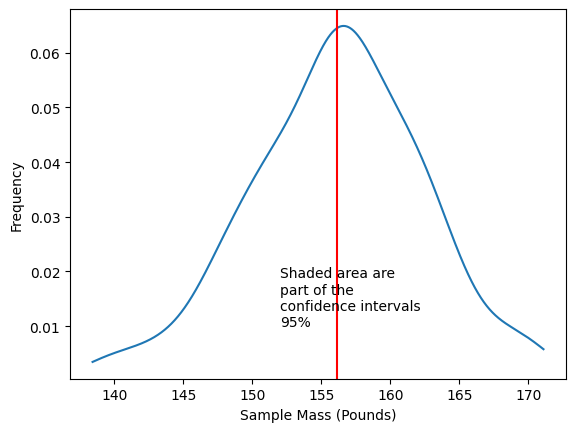

In [50]:
kde = stats.gaussian_kde(neighborhood)
pos = np.linspace(np.min(neighborhood),np.max(neighborhood),10000)
plt.plot(pos,kde(pos))
shade = np.linspace(lower_bound,upper_bound,300)
# plt.fill_between(shade,kde(shade),alpha=0.2)
plt.xlabel('Sample Mass (Pounds)')
plt.ylabel('Frequency')
plt.axvline(x=mean_of_sample_means,color='red')
plt.text(x=152,y=.01,s='Shaded area are \npart of the \nconfidence intervals \n95%')

# Hypothesis Testing

In [67]:
df.rename(columns={'BUILDING CLASS CATEGORY':'bcc','COMMERCIAL UNITS':'cc'},inplace=True)
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,bcc,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,cc,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,borough
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,1
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00,1
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00,1
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,1
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,1


In [73]:
commercial_units_1 = df[df.cc==2]
commercial_units_2 = df[df.cc==1]

In [74]:
# jumlah data, mean, stdeviasi
n_commercial_units_1 = len(commercial_units_1)
mean_commercial_units_1 = commercial_units_1['cc'].mean()
std_commercial_units_1 = commercial_units_1['cc'].std()
print(n_commercial_units_1,mean_commercial_units_1,std_commercial_units_1)

763 2.0 0.0


In [76]:
# jumlah data, mean, stdeviasi
n_commercial_units_2 = len(commercial_units_2)
mean_commercial_units_2 = commercial_units_2['cc'].mean()
std_commercial_units_2 = commercial_units_2['cc'].std()
print(n_commercial_units_2,mean_commercial_units_2,std_commercial_units_2)

3171 1.0 0.0


In [71]:
import statsmodels.api as sm

In [72]:
#karena confidence level 95% maka alpha=0.05
alpha = 0.05

In [77]:
total_units = sm.stats.ztest(commercial_units_2['TOTAL UNITS'].dropna(),commercial_units_1['TOTAL UNITS'].dropna(),alternative='larger')
total_units

(-6.9652268306821, 0.9999999999983606)

In [79]:
if total_units[1]>alpha:
    print('Accept Null Hypothesis (h0) Mean of Commercial Units 1')
else:
    print('Reject Null Hypothesis (h0)  Mean of Commercial Units 2')

Accept Null Hypothesis (h0) Mean of Commercial Units 1


In [83]:
total_units_2 = sm.stats.ztest(commercial_units_2['cc'].dropna(),commercial_units_1['cc'].dropna(),alternative='two-sided')
total_units_2

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/weightstats.py:746: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = (value1 - value2 - diff) / std_diff


(-inf, 0.0)

In [84]:
if total_units_2[1]>alpha:
    print('Accept Null Hypothesis (h0)')
else:
    print('Reject Null Hypothesis (h0)')

Reject Null Hypothesis (h0)
